# Clustering (kMeans, DBSCAN)

This notebook demonstrates unsupervised clustering using:
- synthetic datasets (make_blobs)
- Iris dataset in unsupervised manner (labels used for evaluation only)

Includes visualization via PCA, Elbow method (inertia), k-distance plot for DBSCAN,
and silhouette score calculations.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

sns.set(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize'] = (8, 5)

Generate a synthetic dataset using make_blobs.
We create 500 samples grouped around 4 centers with a standard deviation of 0.8.

In [3]:
X_blobs, y_blobs = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=42)
print('Generated blobs:', X_blobs.shape, 'with true labels:', np.unique(y_blobs))

Generated blobs: (500, 2) with true labels: [0 1 2 3]


"""
Scale the synthetic data for clustering algorithms.
Scaling is recommended for distance-based methods like kMeans and DBSCAN.
"""

In [4]:
scaler_blobs = StandardScaler()
X_blobs_scaled = scaler_blobs.fit_transform(X_blobs)

"""
Reduce the scaled data to 2D using PCA for visualization.
This allows plotting clusters in a 2D scatter plot.
"""

In [5]:
pca_blobs = PCA(n_components=2)
X_blobs_pca = pca_blobs.fit_transform(X_blobs_scaled)
print('PCA projection shape:', X_blobs_pca.shape)

PCA projection shape: (500, 2)


"""
Visualize the true clusters (for reference) using the 2D PCA projection.
Points are colored according to the true labels generated by make_blobs.
"""

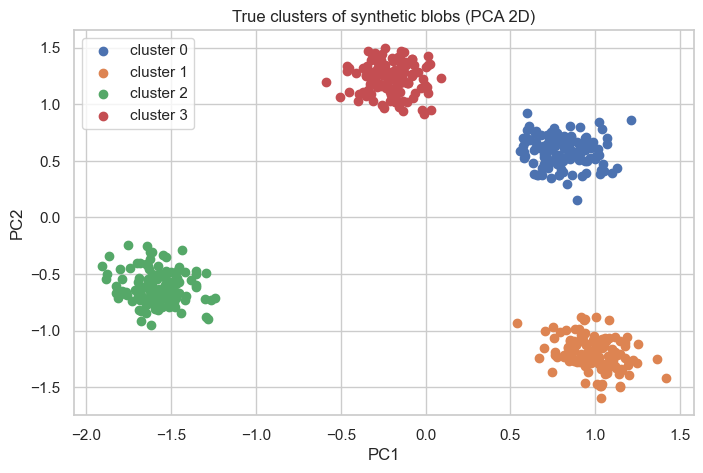

In [6]:
unique_labels = np.unique(y_blobs)
for lab in unique_labels:
    mask = y_blobs == lab
    plt.scatter(X_blobs_pca[mask, 0], X_blobs_pca[mask, 1], label=f'cluster {lab}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('True clusters of synthetic blobs (PCA 2D)')
plt.show()

"""
Compute the inertia for kMeans for k=1 to 10 to plot the Elbow curve.
Inertia is the sum of squared distances to the nearest cluster center.
This helps to choose the optimal number of clusters (k).
"""

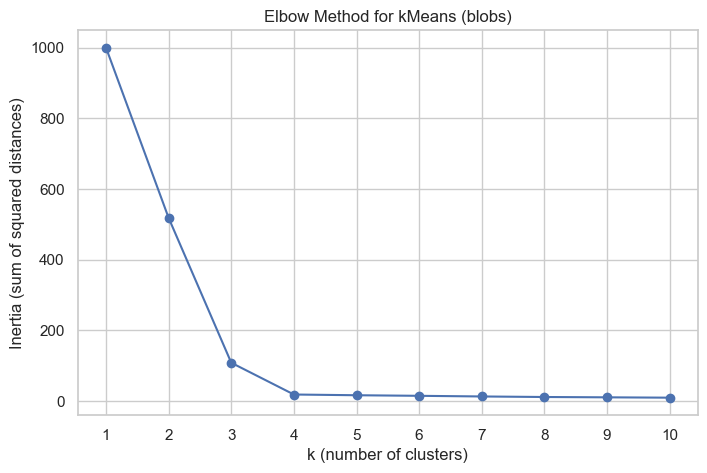

In [7]:
inertias = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_blobs_scaled)
    inertias[k] = kmeans.inertia_

plt.plot(list(inertias.keys()), list(inertias.values()), marker='o')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method for kMeans (blobs)')
plt.xticks(range(1, 11))
plt.show()

"""
Run kMeans clustering with the chosen number of clusters (k=4).
Fit the model and obtain cluster labels.
"""

In [8]:
chosen_k = 4
kmeans_blobs = KMeans(n_clusters=chosen_k, random_state=0, n_init=10)
kmeans_blobs.fit(X_blobs_scaled)
labels_kmeans_blobs = kmeans_blobs.labels_

"""
Visualize the kMeans clusters in 2D PCA space.
Each cluster gets a unique color.
"""

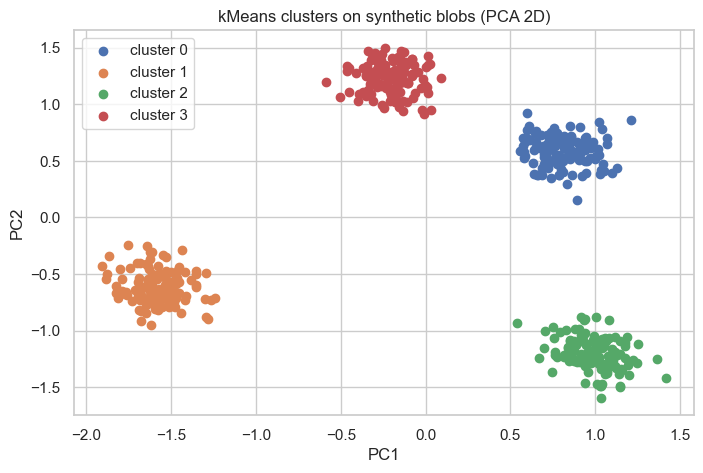

In [9]:
unique_labels = np.unique(labels_kmeans_blobs)
for lab in unique_labels:
    mask = labels_kmeans_blobs == lab
    plt.scatter(X_blobs_pca[mask, 0], X_blobs_pca[mask, 1], label=f'cluster {lab}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('kMeans clusters on synthetic blobs (PCA 2D)')
plt.show()

"""
Compute and print the silhouette score for kMeans clustering.
Silhouette score measures how similar a point is to its own cluster vs other clusters.
"""

In [10]:
n_clusters = len(set(labels_kmeans_blobs)) - (1 if -1 in labels_kmeans_blobs else 0)
if n_clusters > 1:
    score = silhouette_score(X_blobs_scaled, labels_kmeans_blobs)
    print('Silhouette score (kMeans blobs):', score)
else:
    print('Silhouette score undefined for <=1 cluster')

Silhouette score (kMeans blobs): 0.8392940455141259


"""
Plot k-distance graph to help choose epsilon for DBSCAN.
Use 5 nearest neighbors (common choice for min_samples).
"""

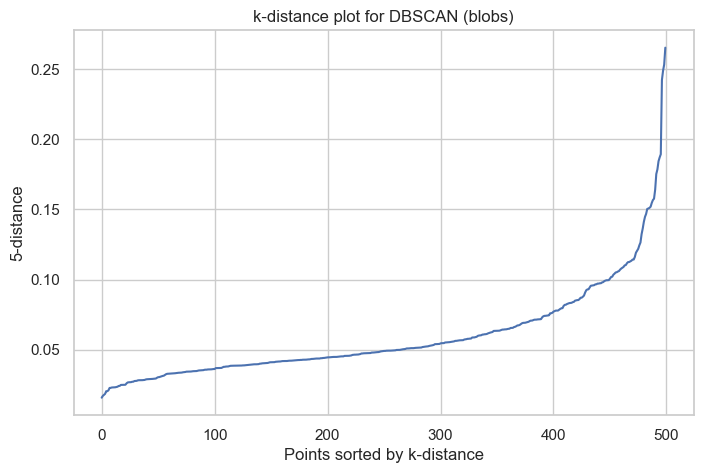

In [11]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X_blobs_scaled)
distances, indices = nbrs.kneighbors(X_blobs_scaled)
k_distances = np.sort(distances[:, -1])
plt.plot(k_distances)
plt.xlabel('Points sorted by k-distance')
plt.ylabel('5-distance')
plt.title('k-distance plot for DBSCAN (blobs)')
plt.show()

"""
Run DBSCAN on the scaled blob dataset with eps=0.4 and min_samples=5.
Obtain cluster labels and visualize in PCA space.
"""

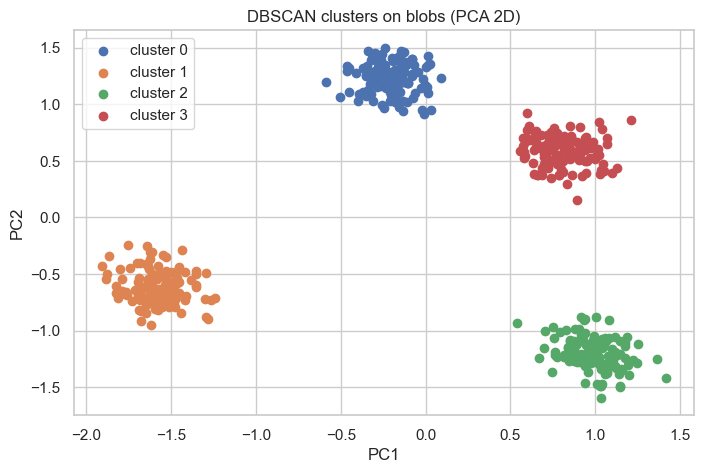

In [12]:
dbscan_blobs = DBSCAN(eps=0.4, min_samples=5)
labels_dbscan_blobs = dbscan_blobs.fit_predict(X_blobs_scaled)

unique_labels = np.unique(labels_dbscan_blobs)
for lab in unique_labels:
    mask = labels_dbscan_blobs == lab
    if lab == -1:
        plt.scatter(X_blobs_pca[mask,0], X_blobs_pca[mask,1], c='k', marker='x', label='noise')
    else:
        plt.scatter(X_blobs_pca[mask,0], X_blobs_pca[mask,1], label=f'cluster {lab}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('DBSCAN clusters on blobs (PCA 2D)')
plt.show()

"""
Compute silhouette score for DBSCAN clusters.
"""

In [13]:
n_clusters = len(set(labels_dbscan_blobs)) - (1 if -1 in labels_dbscan_blobs else 0)
if n_clusters > 1:
    score = silhouette_score(X_blobs_scaled, labels_dbscan_blobs)
    print('Silhouette score (DBSCAN blobs):', score)
else:
    print('Silhouette score undefined for <=1 cluster')

Silhouette score (DBSCAN blobs): 0.8392940455141259


"""
Compare kMeans clustering to true labels using a contingency table.
"""

In [15]:
print('Contingency table: true labels vs kMeans clusters')
pd.crosstab(y_blobs, labels_kmeans_blobs)

Contingency table: true labels vs kMeans clusters


col_0,0,1,2,3
row_0,,,,
0,125,0,0,0
1,0,0,125,0
2,0,125,0,0
3,0,0,0,125


"""
Now apply the same procedure to the Iris dataset.
Load data, scale, PCA, run kMeans and DBSCAN, visualize and evaluate.
"""

In [17]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Scale features
scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)

# PCA for visualization
pca_iris = PCA(n_components=2)
X_iris_pca = pca_iris.fit_transform(X_iris_scaled)

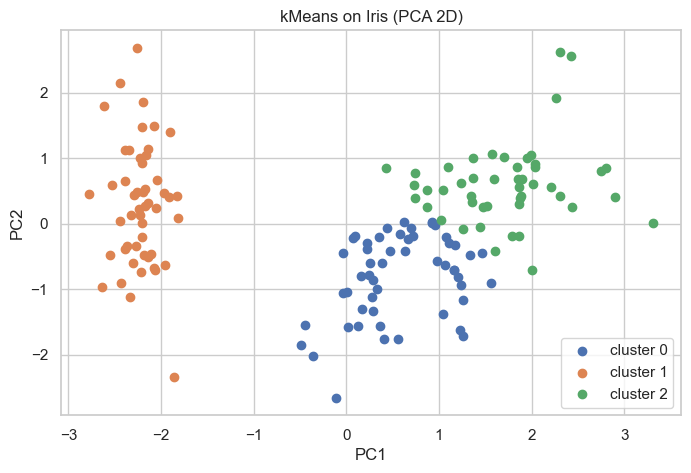

Silhouette score (kMeans Iris): 0.45994823920518635
Contingency: true species vs kMeans clusters
col_0   0   1   2
row_0            
0       0  50   0
1      39   0  11
2      14   0  36


In [18]:
# kMeans on Iris with k=3
kmeans_iris = KMeans(n_clusters=3, random_state=0, n_init=10)
labels_kmeans_iris = kmeans_iris.fit_predict(X_iris_scaled)

# Plot clusters
unique_labels = np.unique(labels_kmeans_iris)
for lab in unique_labels:
    mask = labels_kmeans_iris == lab
    plt.scatter(X_iris_pca[mask,0], X_iris_pca[mask,1], label=f'cluster {lab}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('kMeans on Iris (PCA 2D)')
plt.show()

# Silhouette score
n_clusters = len(set(labels_kmeans_iris)) - (1 if -1 in labels_kmeans_iris else 0)
if n_clusters > 1:
    score = silhouette_score(X_iris_scaled, labels_kmeans_iris)
    print('Silhouette score (kMeans Iris):', score)
else:
    print('Silhouette score undefined for <=1 cluster')

# Contingency table
print('Contingency: true species vs kMeans clusters')
print(pd.crosstab(y_iris, labels_kmeans_iris))

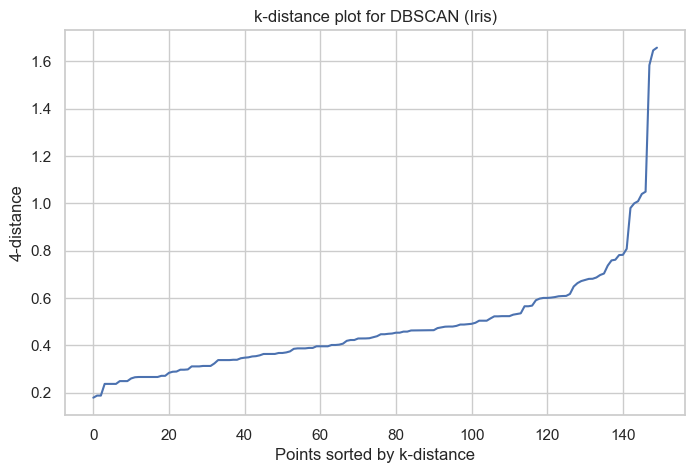

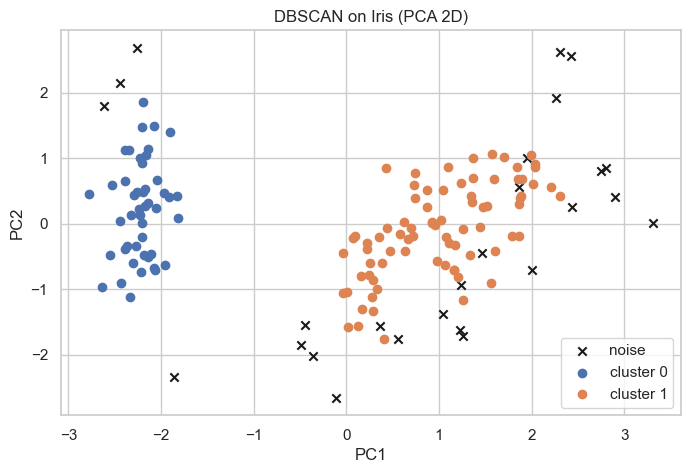

Silhouette score (DBSCAN Iris): 0.4027617471797909
Contingency: true species vs DBSCAN clusters
col_0  -1   0   1
row_0            
0       4  46   0
1       8   0  42
2      14   0  36


In [19]:
# DBSCAN on Iris: try eps=0.6, min_samples=5
nbrs_iris = NearestNeighbors(n_neighbors=4).fit(X_iris_scaled)
distances_iris, indices_iris = nbrs_iris.kneighbors(X_iris_scaled)
k_distances_iris = np.sort(distances_iris[:, -1])
plt.plot(k_distances_iris)
plt.xlabel('Points sorted by k-distance')
plt.ylabel('4-distance')
plt.title('k-distance plot for DBSCAN (Iris)')
plt.show()

dbscan_iris = DBSCAN(eps=0.6, min_samples=5)
labels_dbscan_iris = dbscan_iris.fit_predict(X_iris_scaled)

unique_labels = np.unique(labels_dbscan_iris)
for lab in unique_labels:
    mask = labels_dbscan_iris == lab
    if lab == -1:
        plt.scatter(X_iris_pca[mask,0], X_iris_pca[mask,1], c='k', marker='x', label='noise')
    else:
        plt.scatter(X_iris_pca[mask,0], X_iris_pca[mask,1], label=f'cluster {lab}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('DBSCAN on Iris (PCA 2D)')
plt.show()

n_clusters = len(set(labels_dbscan_iris)) - (1 if -1 in labels_dbscan_iris else 0)
if n_clusters > 1:
    score = silhouette_score(X_iris_scaled, labels_dbscan_iris)
    print('Silhouette score (DBSCAN Iris):', score)
else:
    print('Silhouette score undefined for <=1 cluster')

print('Contingency: true species vs DBSCAN clusters')
print(pd.crosstab(y_iris, labels_dbscan_iris))